## TF 低阶API

- 张量操作

 结构操作：张量创建、索引切片、维度变换，合并分割
 
 数学运算：标量运算，向量运算，矩阵运算，广播机制
- 计算图
- 自动微分

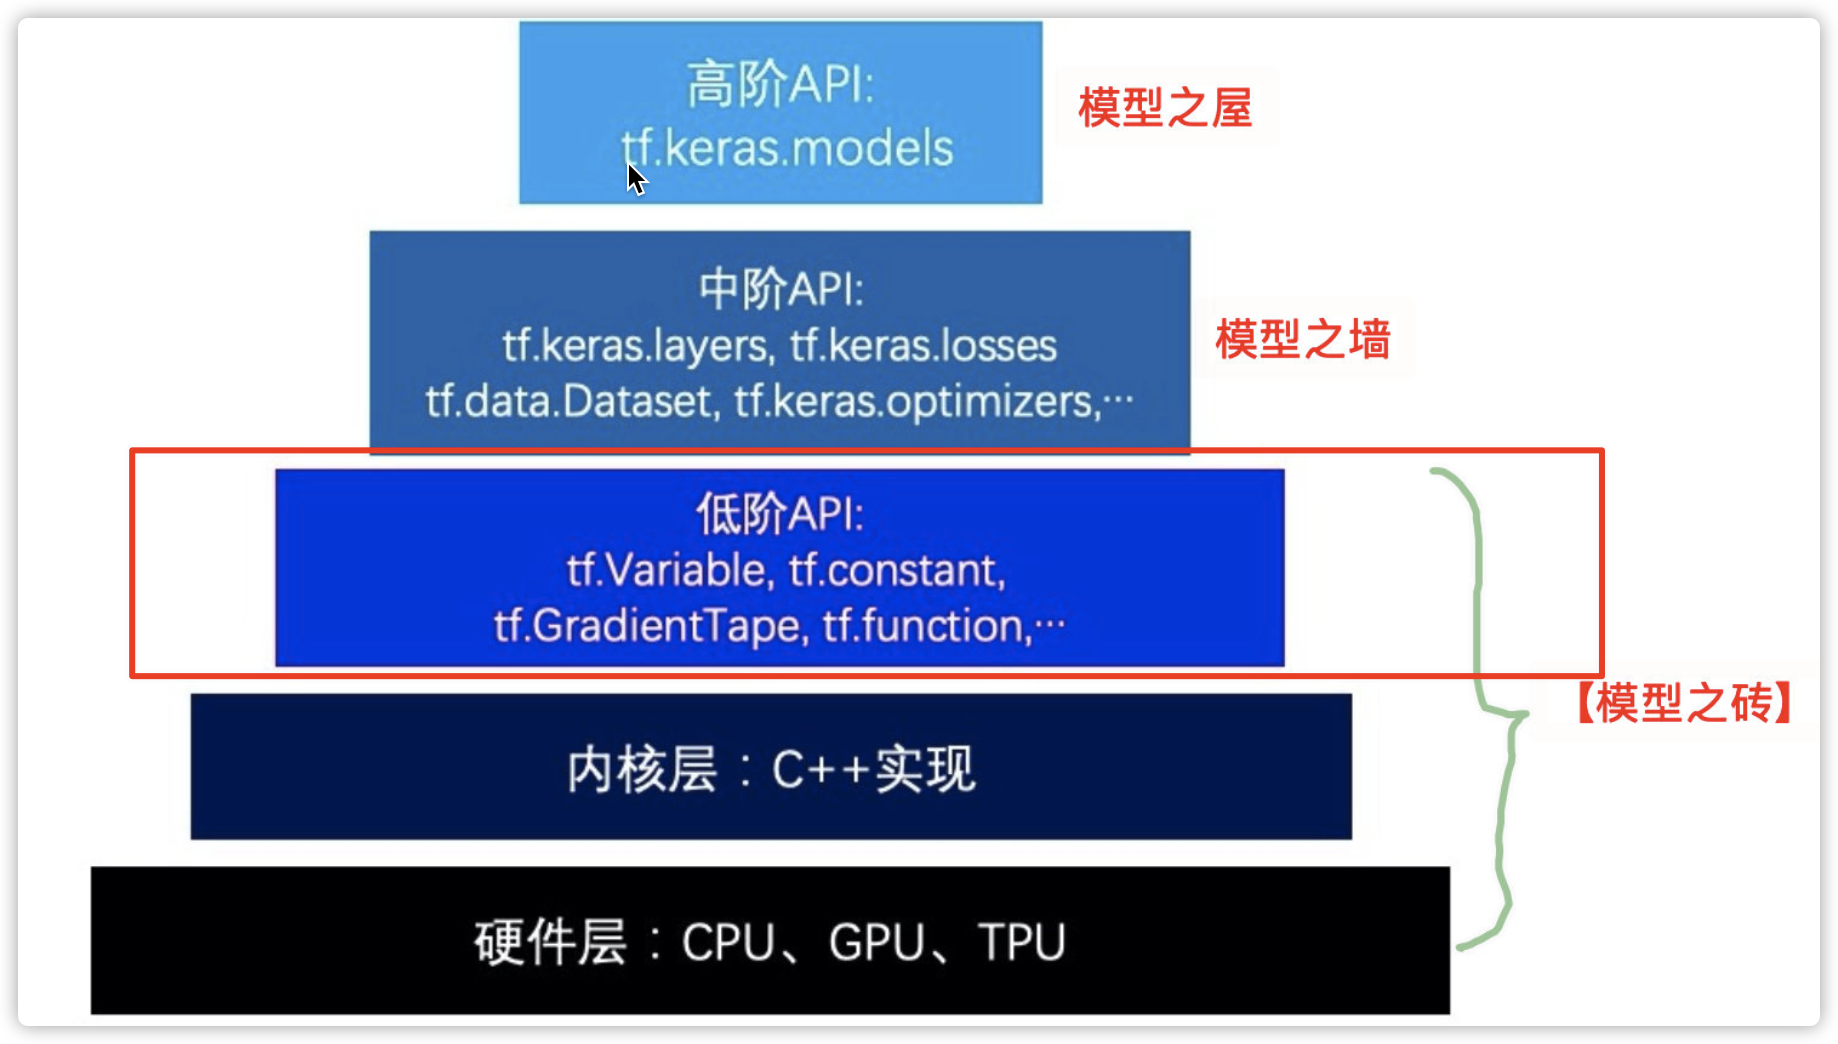

在低阶API层次上， 可以把TF 当做一个增强版的 numpy 使用


## 2.1 结构操作


In [3]:
import tensorflow as tf
import numpy as np

In [5]:
a = tf.constant([1,2,3])
b =tf.range(1,10, delta=2)
c =tf.linspace(0.0,0.2*3.14, 100)
d= tf.fill([3,2],5)
tf.print(a), tf.print(b), tf.print(c), tf.print(d)

[1 2 3]
[1 3 5 7 9]
[0 0.00634343456 0.0126868691 ... 0.615313172 0.621656597 0.628]
[[5 5]
 [5 5]
 [5 5]]


(None, None, None, None)

### 2.1.1 切片

In [56]:
tf.random.set_seed(3)
t = tf.random.uniform([5,5],minval=0,maxval=10,dtype=tf.int32)
tf.print(t)

[[4 7 4 2 9]
 [9 1 2 4 7]
 [7 2 7 4 0]
 [9 6 9 7 2]
 [3 7 0 0 3]]


In [57]:
# 第0 行, 倒数第一行
tf.print(t[0]), tf.print(t[-1])

[4 7 4 2 9]
[3 7 0 0 3]


(None, None)

In [58]:
# 第1行第2列
tf.print(t[0,1])

7


In [59]:
# 取特定的行，以下效果相同
tf.print(t[1:4, :])
tf.print('--'*20)
# tf.slice 设置初始位置，以及size大小
tf.print(tf.slice(t,[1,0],[3,5])) #tf.slice(input,begin_vector,size_vector)

[[9 1 2 4 7]
 [7 2 7 4 0]
 [9 6 9 7 2]]
----------------------------------------
[[9 1 2 4 7]
 [7 2 7 4 0]
 [9 6 9 7 2]]


In [60]:
#对变量来说，还可以使用索引和切片修改部分元素
x = tf.Variable([[1,2],[3,4]],dtype = tf.float32)
x[1,:].assign(tf.constant([0.0,0.0]))
tf.print(x)

[[1 2]
 [0 0]]


In [61]:
a = tf.random.uniform([3,3,3],minval=0,maxval=10,dtype=tf.int32)
tf.print(a)

[[[7 3 9]
  [9 0 7]
  [9 6 7]]

 [[1 3 3]
  [0 8 1]
  [3 1 0]]

 [[4 0 6]
  [6 2 2]
  [7 9 5]]]


In [62]:
# ...可以表示多个冒号
tf.print(a[...,1])  # 注意通道数的选取

[[3 0 6]
 [3 8 1]
 [0 2 9]]


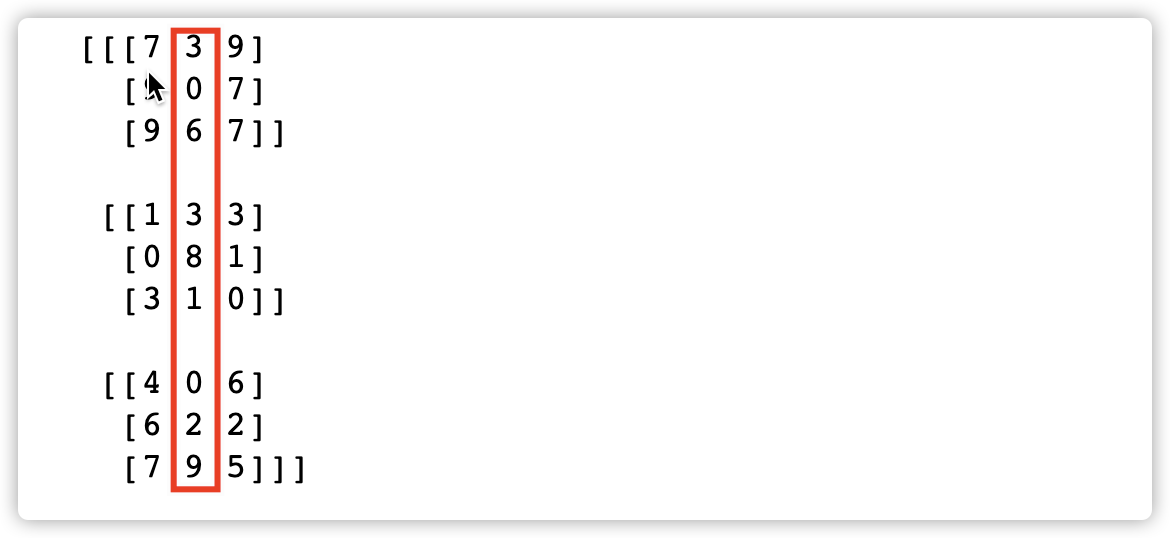

- 不规则切片提取

举例：4个班级，10个学生每个班级，5门成绩

In [67]:
scores = tf.random.uniform((4,10,5), minval=0, maxval=100, dtype=tf.int32)
tf.print(scores)

[[[33 0 79 89 59]
  [44 81 44 44 73]
  [86 40 33 20 30]
  ...
  [27 48 2 70 31]
  [4 10 13 72 27]
  [38 41 30 13 25]]

 [[23 70 41 43 68]
  [3 67 70 64 98]
  [77 65 78 22 42]
  ...
  [40 87 44 63 17]
  [61 25 90 33 87]
  [75 21 52 33 96]]

 [[25 90 61 22 52]
  [45 24 60 19 96]
  [30 88 72 14 9]
  ...
  [75 43 67 87 71]
  [45 50 68 33 81]
  [23 23 73 76 57]]

 [[86 17 17 13 33]
  [20 56 86 29 11]
  [43 58 54 54 25]
  ...
  [76 51 51 28 83]
  [96 97 86 75 90]
  [54 85 30 58 13]]]


In [76]:
#抽取每个班级第0个学生，第2个学生，第3个学生的全部成绩
tf.gather(scores,[0,2,3],axis=1)

<tf.Tensor: shape=(4, 3, 5), dtype=int32, numpy=
array([[[33,  0, 79, 89, 59],
        [86, 40, 33, 20, 30],
        [43, 83, 67, 82, 20]],

       [[23, 70, 41, 43, 68],
        [77, 65, 78, 22, 42],
        [28, 28, 70, 96, 16]],

       [[25, 90, 61, 22, 52],
        [30, 88, 72, 14,  9],
        [23, 58, 22, 81, 21]],

       [[86, 17, 17, 13, 33],
        [43, 58, 54, 54, 25],
        [30, 22, 16, 38, 51]]], dtype=int32)>

In [77]:
#抽取每个班级第0个学生，第2个学生，第3个学生的 第1，4 门成绩
tf.gather(tf.gather(scores,[0,2,3],axis=1), [1,4],axis=2)

<tf.Tensor: shape=(4, 3, 2), dtype=int32, numpy=
array([[[ 0, 59],
        [40, 30],
        [83, 20]],

       [[70, 68],
        [65, 42],
        [28, 16]],

       [[90, 52],
        [88,  9],
        [58, 21]],

       [[17, 33],
        [58, 25],
        [22, 51]]], dtype=int32)>

![image-20210822104756635](https://tva1.sinaimg.cn/large/008i3skNgy1gtpdhfgoyrj61800k2dih02.jpg)

In [80]:
# 抽取第0个班级第0个学生，第2个班级的第2个学生，第3个班级的第6个学生的全部成绩
#indices的长度为采样样本的个数，每个元素为采样位置的坐标
s = tf.gather_nd(scores,indices = [(0,0),(2,2),(3,6)])
s

<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
array([[33,  0, 79, 89, 59],
       [30, 88, 72, 14,  9],
       [97, 48, 30, 12, 81]], dtype=int32)>

### 2.1.2 维度变换
- tf.reshape()
- tf.expand_dims()
- tf.transpose()    改变张量元素的存储顺序,同时也改变了张量的视图


In [115]:
a = tf.random.uniform(shape=[1,3,3,2],
                      minval=0,maxval=255,dtype=tf.int32)
a

<tf.Tensor: shape=(1, 3, 3, 2), dtype=int32, numpy=
array([[[[227,  83],
         [ 52, 208],
         [227, 132]],

        [[ 92,  40],
         [239,  25],
         [ 26,  19]],

        [[ 61, 196],
         [ 80,  19],
         [208, 198]]]], dtype=int32)>

In [116]:
# 改成(3,6)
tf.reshape(a,[3,6])

<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
array([[227,  83,  52, 208, 227, 132],
       [ 92,  40, 239,  25,  26,  19],
       [ 61, 196,  80,  19, 208, 198]], dtype=int32)>

In [117]:
b = tf.expand_dims(a,axis=0)
b

<tf.Tensor: shape=(1, 1, 3, 3, 2), dtype=int32, numpy=
array([[[[[227,  83],
          [ 52, 208],
          [227, 132]],

         [[ 92,  40],
          [239,  25],
          [ 26,  19]],

         [[ 61, 196],
          [ 80,  19],
          [208, 198]]]]], dtype=int32)>

In [118]:
# 删除维度
tf.squeeze(b, axis=0)  # shape=(1, 1, 3, 3, 2)--->shape=(1, 3, 3, 2)

<tf.Tensor: shape=(1, 3, 3, 2), dtype=int32, numpy=
array([[[[227,  83],
         [ 52, 208],
         [227, 132]],

        [[ 92,  40],
         [239,  25],
         [ 26,  19]],

        [[ 61, 196],
         [ 80,  19],
         [208, 198]]]], dtype=int32)>

In [93]:
# Batch,Height,Width,Channel
a = tf.random.uniform(shape=[100,600,600,4],minval=0,maxval=255,dtype=tf.int32)
tf.print(a.shape)

# 转换成 Channel,Height,Width,Batch
s= tf.transpose(a,perm=[3,1,2,0])
tf.print(s.shape)

TensorShape([100, 600, 600, 4])
TensorShape([4, 600, 600, 100])


### 2.1.3 合并分割
- tf.concat()
- tf.stack()   会创建新的维度
- tf.split()

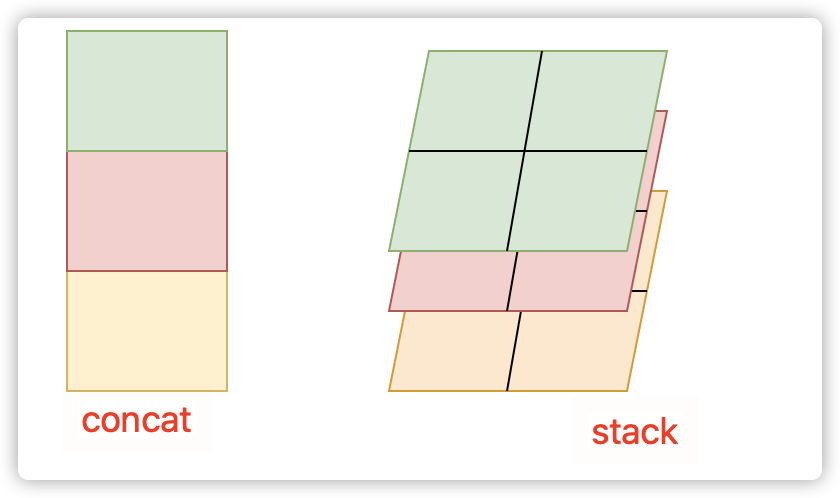

In [120]:
a = tf.constant([[1.0,2.0],[3.0,4.0]])
b = tf.constant([[5.0,6.0],[7.0,8.0]])
c = tf.constant([[9.0,10.0],[11.0,12.0]])

tf.concat([a,b,c],axis = 0)

<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.],
       [11., 12.]], dtype=float32)>

In [121]:
tf.concat([a,b,c,],axis=1)

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[ 1.,  2.,  5.,  6.,  9., 10.],
       [ 3.,  4.,  7.,  8., 11., 12.]], dtype=float32)>

In [122]:
tf.stack([a,b,c])

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 1.,  2.],
        [ 3.,  4.]],

       [[ 5.,  6.],
        [ 7.,  8.]],

       [[ 9., 10.],
        [11., 12.]]], dtype=float32)>

In [123]:
tf.stack([a,b,c], axis=1)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]],

       [[ 3.,  4.],
        [ 7.,  8.],
        [11., 12.]]], dtype=float32)>

## 2.2 数学运算

In [103]:
a = tf.constant([[1.0,2],[-3,4.0]])
b = tf.constant([[5.0,6],[7.0,8.0]])
a+b  #运算符重载

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 6.,  8.],
       [ 4., 12.]], dtype=float32)>

In [105]:
a-b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ -4.,  -4.],
       [-10.,  -4.]], dtype=float32)>

In [107]:
a*b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[  5.,  12.],
       [-21.,  32.]], dtype=float32)>

### 2.2.1 矩阵运算

In [109]:
#矩阵乘法
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[2,0],[0,2]])
a@b  #等价于tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [6, 8]], dtype=int32)>

In [112]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [6, 8]], dtype=int32)>

In [113]:
tf.multiply(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 0],
       [0, 8]], dtype=int32)>